<a href="https://colab.research.google.com/github/JackiApligian/EnsembleTech-EasyVisa/blob/main/CURRENT_ACTIVE_PROJECT_DSBA_Project_ET_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### Importing necessary libraries and data

In [ ]:
#Importing all necessary libraries
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

#importing the data set
visa = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Ensemble Techniques/EasyVisa.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
#first 5 rows of data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#last 5 rows of data
data.tail()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**The data imported correctly. There are 25479 rows of data in this data set.**

In [ ]:
#understanding the shape of the data set
data.shape

(25480, 12)

**There are 25479 rows and 12 columns in this data set.**

In [ ]:
#Checking the information contained in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**The majority of data points are objects with only 3 numerical data points. There are no missing values. We will need to examine the values to see the quality of data.**

In [ ]:
#Checking for duplicated values
data.duplicated().sum()

0

**There are no duplicated values.**

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
#Checking the statistical summary of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**There are 6 continents, with the most coming from Asia.**

**There are 4 levels of education, with the most holding a Bachelor's degree.**

**The majority of applicants have job experience and do not require training.**

**The average number of employees for these businesses are 5,667 and the average year of establishment was 1979. There is a minimum of -26 number of employees. This is not correct and so we will need to address this.**


**There are 5 regions of employment with the most in the Northeast.**

**The average prevailing wage is $74,456 and is a full time, yearly salary.**

**The majority of applicants were certified.**

In [ ]:
#Checking for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**There are no missing values.**

In [ ]:
#Fixing the negative values in number of employees columns
data.loc[data['no_of_employees']<0,'no_of_employees'].shape


(33,)

**There are 33 times that negative numbers are used in the number of employees column. Let's change the negative values for absolute values for further analysis.**


In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"]) 

In [ ]:
#Checking to see if the negative values in number of employees column was removed
data.loc[data['no_of_employees']<0,'no_of_employees'].shape

(0,)

**Negative values were successfully changed to absolute.**

In [ ]:
#Checking the statistical summary of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.089207,22877.917453,11.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**There are no negative values in the Number of Employees column.**

In [ ]:
#Checking the number of unique catagories
# Making a list of all catagorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

**There are far more applicants from Asia than any other continent. Bachelors and Masters degrees are prevalent. There are approximately 4000 more applicants with job experience than without. The vast majority of applicants do not need training. The regions are spread throughout the country. The majority of jobs are offered with yearly salaries and full time basis.**

In [ ]:
# checking the number of unique values
data["case_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0           EZYV01
1           EZYV02
2           EZYV03
3           EZYV04
4           EZYV05
           ...    
25475    EZYV25476
25476    EZYV25477
25477    EZYV25478
25478    EZYV25479
25479    EZYV25480
Name: case_id, Length: 25480, dtype: object>

**Each Case ID is unique and represents a single individual. The Case ID column is not necessary for data analysis and so we will drop it from the data set.**

In [ ]:
#dropping Case ID column
data.drop(["case_id"], axis=1, inplace=True)

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Case ID has been dropped successfully.**

# **Univariate Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
   
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
     # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) 
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  

**Let's look into the different univariate aspects of the data.**

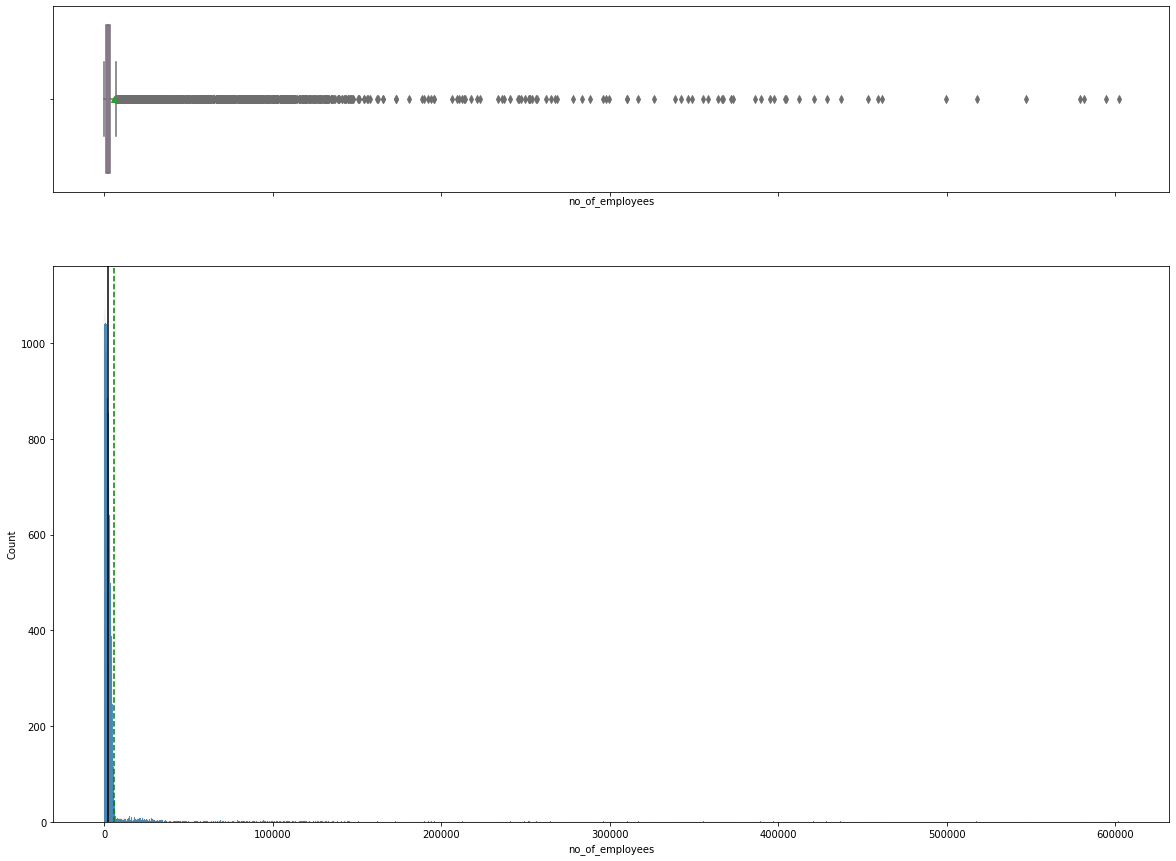

In [ ]:
#Number of Employees
histogram_boxplot(data, "no_of_employees", figsize=(20,15))

**There is a wide range of number of employee outliers but the majority of companies have much less than 100,000.** 

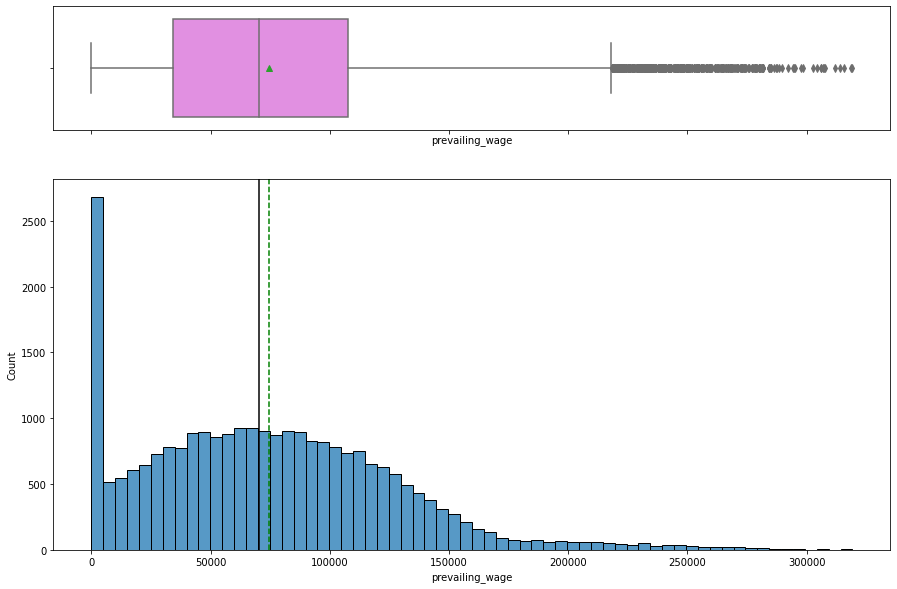

In [ ]:
#What is the prevailing wage?
histogram_boxplot(data,'prevailing_wage')

**There are many entries under 100 which will need to be looked at closer. The median and mean are close to each other at approximately 60,000-75,000 a year.**

In [ ]:
# checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage'] <100, 'prevailing_wage'].value_counts()

15.7716    1
3.3188     1
25.0117    1
96.1061    1
11.4219    1
          ..
45.9315    1
5.6396     1
74.4049    1
84.9745    1
54.9196    1
Name: prevailing_wage, Length: 176, dtype: int64

**There are 176 entries that have wages under 100.**

In [ ]:
#Looking into the type of wage paid to those entries under 100
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

**There are 176 hourly entries which account for the 176 entries of wages under 100.**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

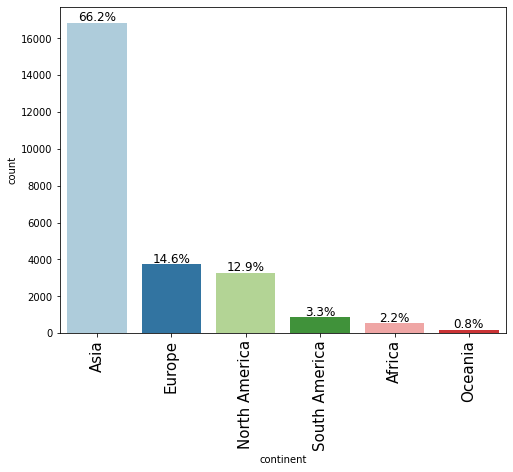

In [ ]:
#What can we learn about the origination continent of applicants?
labeled_barplot(data, "continent", perc=True) 

**The majority of applicants are from Asia at 66.2%. Europe, and North America are the next two continents at 14.6% and 12.9% respectively. Africa and Oceania have the least amount of applicants with 2.2% and 0.8% respectively.**

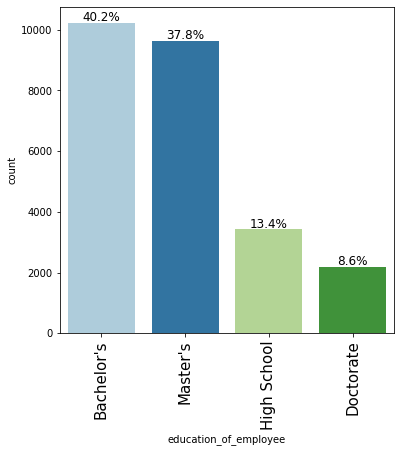

In [ ]:
#Observations on the education of the employees
labeled_barplot(data,'education_of_employee', perc=True)

**The majority of applicants have a bachelors or masters degree with a slight majority of bachelors at 40.2% compared to 37.8% with masters.  There are 13.4% for HS diplomas. The least amount of applicants have Doctorate degrees at 8.6%.**

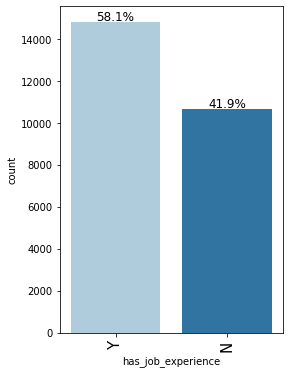

In [ ]:
#Observations on job experience
labeled_barplot(data,'has_job_experience', perc=True)

**The majority of applicants have prior job experience at 58.1% followed closely by 41.9% with no prior experience.**

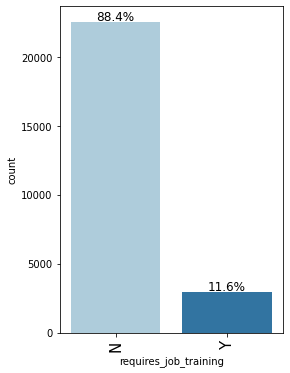

In [ ]:
#observations on needed job training for applicants
labeled_barplot(data,'requires_job_training', perc=True)

**The vast majority of applicants do not require job training at 88.4%. There were 11.6% that will require job training.**

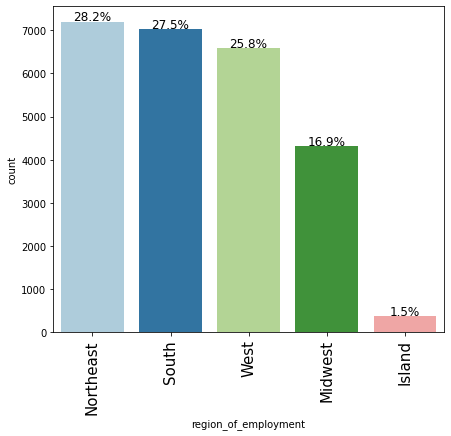

In [ ]:
#Observations of the region of employment
labeled_barplot(data,'region_of_employment',perc=True) 

**The Northeast (28.2%),South(27.5%) and the West(25.8%) are the most popular regions for employment. The Midwest(16.9%) and Islands(1.5%) were the least popular regions.**

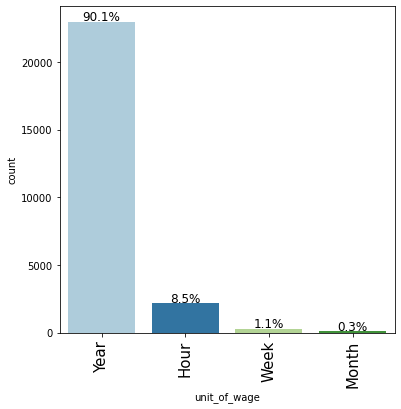

In [ ]:
#Further observations on the unit of wage
labeled_barplot(data, 'unit_of_wage', perc=True)

**90.1% of all applicants were paid a yearly salary. There are 8.5% hourly, 1.1% weekly and 0.3% montly wages.**

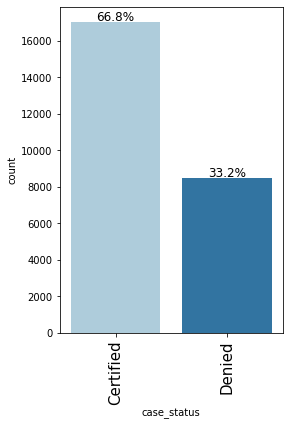

In [ ]:
#Observations of case status of the applicants
labeled_barplot(data,'case_status', perc=True)

**The majority of applicants were certified for employment at 66.8% and 33.2% were denied.**

## **Bivariate Analysis**

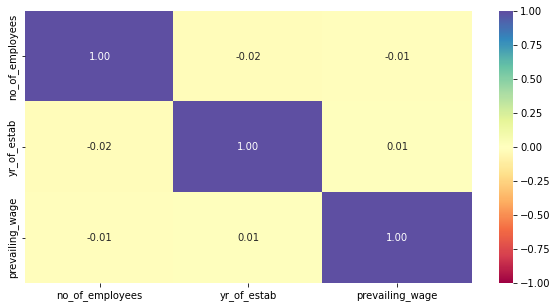

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The heatmap suggests little to no coorelation between the numeric data points in the data set.**

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Exploring these Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


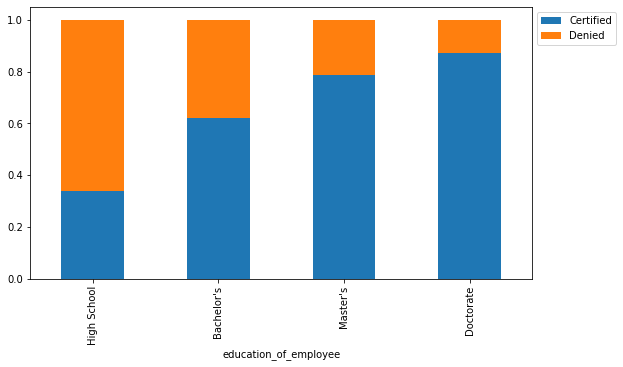

In [ ]:
#Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
stacked_barplot(data, "education_of_employee", "case_status")

**The higher the education level of the applicant, the higher the number of successful certification of employement.** 

In [ ]:
#Different regions have different requirements of talent having diverse educational backgrounds. What can we learn from this data?
pd.crosstab(data['region_of_employment'], data['education_of_employee'])

education_of_employee,Bachelor's,Doctorate,High School,Master's
region_of_employment,,,,
Island,129,25,60,161
Midwest,1315,256,736,2000
Northeast,2874,656,905,2760
South,2991,541,934,2551
West,2925,714,785,2162


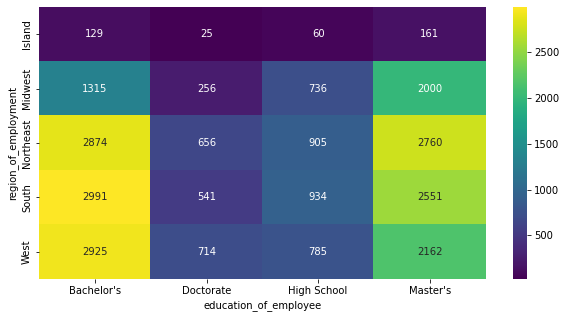

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['region_of_employment'], data['education_of_employee']), cmap="viridis", 
            annot=True, fmt="g", cbar=True)

**The highest coorelation is between those applicants with Bachelor's degrees and the South, West and Northeast regions. There are higher coorelations with Master's degrees and the Northeast and South. The least coorelated were Island and Doctorate applicants but this could be due to the lesser numbers in these catagories.**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


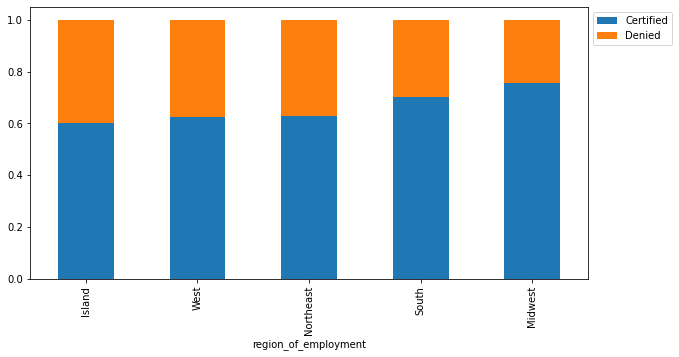

In [ ]:
#Observations on percentage of visa certifications across each region
stacked_barplot(data, "region_of_employment", "case_status")

**There is a slight increase of certified applicants in the Midwest and South with the NE, West and Island applicants around the same number of certifications. This is interesting because there are less applicants for the Midwest than the South, NE and West. This shows the potential for a higher success for applicants that apply for a midwest position.** 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


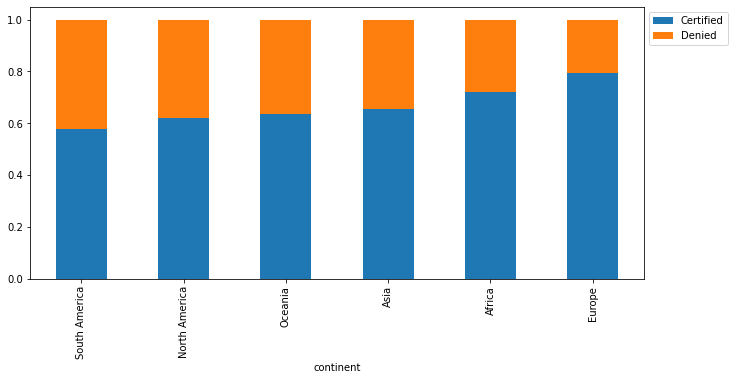

In [ ]:
#How does the visa status vary across different continents?
stacked_barplot(data, "continent", "case_status")

**The most certified applicants came from the continent of Europe. South America has the least number of certified applications. As seen in a previous graph, there are significantly more applicants from the Asian continent than others but here we see that Asian applicants are not at an advantage in being certified.**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


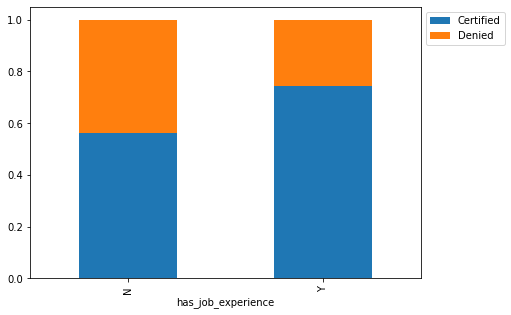

In [ ]:
#Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
stacked_barplot(data, "has_job_experience", "case_status")

**There are more certified applications for applicants that have job experience vs those that do not.But this is not as big of a difference as one might assume.**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


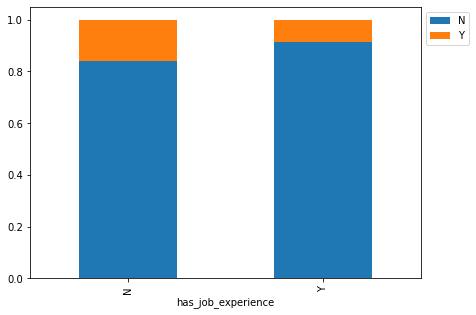

In [ ]:
#Do the employees who have prior work experience require any job training?
stacked_barplot(data, "has_job_experience", "requires_job_training")

**The majority of people do not need job training whether or not they have previous job experience. However, of those with no job experience, the need for training is more than those with previous job experience.**

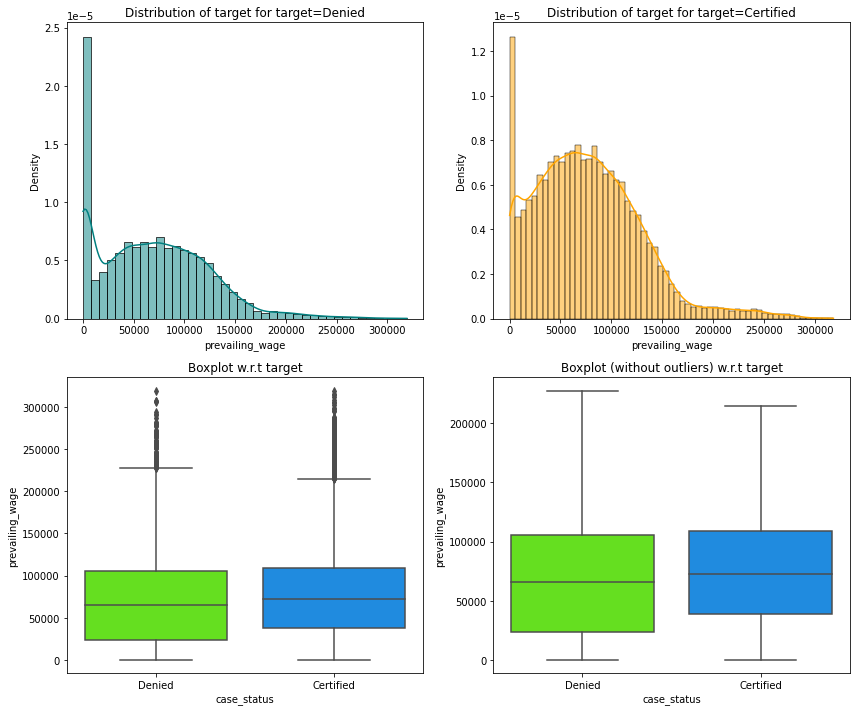

In [ ]:
#The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

**The distribusion is skewed right for both certified and denied applicants and follow realtively the same distribution curve. There are far more hourly, weekly or monthly paid applicants that were denied than those that were certified. The average prevailing yearly salary was relatively the same between those who were denied and those that were certified.**

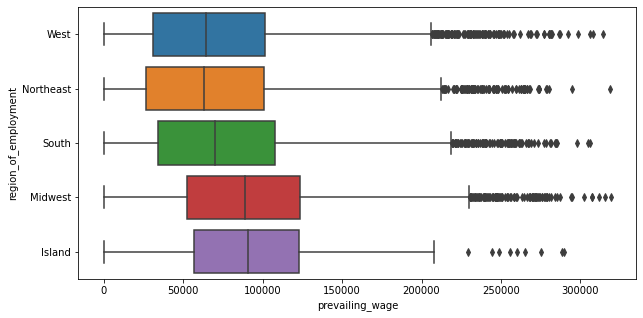

In [ ]:
#Does the region of employment change the prevailing wage of the employee?
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="prevailing_wage", y="region_of_employment")
plt.show()

**The average wage for the West, NE and South are relatively the same. The Midwest and Island applicants are more than the other three. This makes sense because there are fewer applicants for the Midwest and Island regions so they must pay more to entice applicants.**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


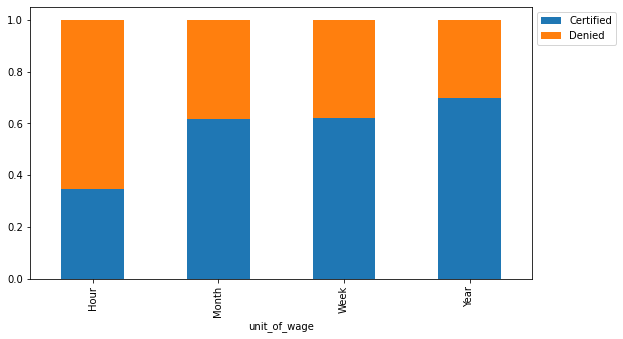

In [ ]:
#In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
stacked_barplot(data, "unit_of_wage", "case_status")

**The hourly paid employees had a much higher likelihood of being denied. Monthly and weekly wages were about the same likelihood of being certifed and yearly paid employees are the most likely to be certified.**

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**Outlier Check**

*   Checking for outliers in the data.



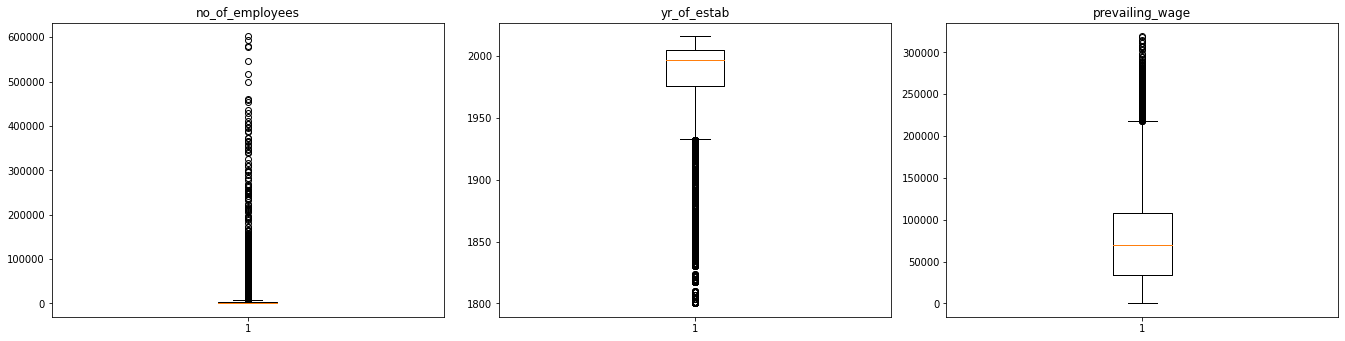

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(25, 18))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

**There is a large number of outliers on the high end for the number of employees and prevailing wage. There is a large number of outliers on the small end of the data for years of estabishment. These outliers do not appear to be inaccurate entries so we will not treat them.**

In [ ]:
#checking for missing values
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**There are no missing values to treat.**

In [ ]:
#Changing case status from Certified and Denied to 1 and 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [ ]:
#Establishing the independent variable for testing
X = data.drop(["case_status"], axis=1) 
Y = data["case_status"]

#creating dummies for object type data
X = pd.get_dummies(X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True)
X.head()

#spliting the data into 70% training and 30% testing  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, )


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


**All objects and category data types have been split into dummy variables sucessfully.**
**The dataset was also split into training and testing sets and have set the case status as our independent variable. There are 66% certified and 34% denied in the training set. There are 68% certified and 32% denied in the testing set.**

## Building bagging and boosting models

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Decision Tree**


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.66405  0.742184   0.757385  0.749708


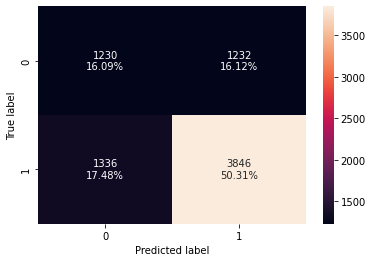

In [ ]:
#Building Decision Tree model and checking perfomance on training and testing data.
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

**The training performance of this model is overfit since the F1 score accounts for all of the data points at 100%. The Testing perfomance is at a 75% F1 score which is really good but due to the overfitting in the training cannot be trusted to provide accurate information on False Positive and False Negatives.**

##  Will tuning the hyperparameters improve the model performance?

**Hyperparameter Tuning - Decision Tree**

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.672741  0.996198   0.670591  0.801591
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.683281  0.994211   0.683017  0.809745


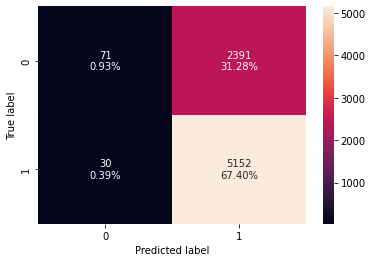

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

**The Hypertuned tree improved the F1 consistency between training and testing data. Testing F1 improved from 75% to 81%. Training F1 is 80% and Testing is 81%. This model catches 67% of the true negatives but only 0.93% of the true positives. Is also shows only 0.39% of the false negatives and 31% of the false positives.**

## **Bagging Model Building and Hyperparameter Tuning**

**Bagging Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.984526  0.985468   0.991162  0.988307
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.696102  0.773061   0.777411  0.77523


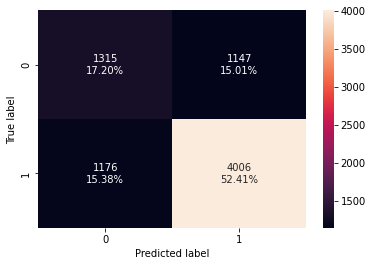

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

**The training data F1 is at 99% which is overfit and the testing data F1 is around 78%. Let's apply some hyperparameters to see if we can correct the overfitting.**

**Hyperparameter Tuning- Bagging Classifier**

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.663602     1.0   0.663602  0.797789
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.677917     1.0   0.677917  0.808046


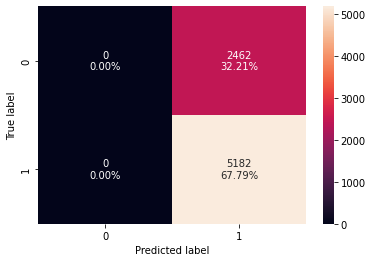

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

**The F1 values for both training and testing are close to the same with training at 80% and testing at 81%.**

**Building a Random Forest.**

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.727368  0.833655   0.779502  0.80567


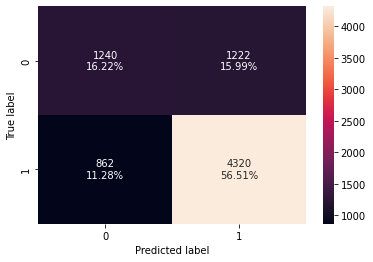

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

**Random Forest shows an over fit on the training data with an F1 of 100% and a 81% F1 on the testing. Let's tune the model to see if we can fix the overfitting.**

**Hyperparameter Tuning- Random Forest**

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1) 
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.765699  0.910696   0.775412  0.837627
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749084  0.894056   0.771909  0.828505


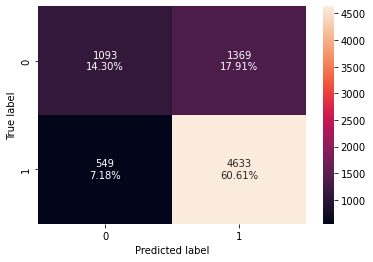

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

**This model is showing a F1 score of 82% on the training data and 83% on the testing data. This is an improvement in the overfitting without much change to the testing data.**

## **Boosting - Model Building and Hyperparameter Tuning**

## Model Performance Comparison and Conclusions

**AdaBoost Classifier**

   Accuracy    Recall  Precision        F1
0  0.737441  0.885941    0.75881  0.817462
   Accuracy    Recall  Precision        F1
0  0.738488  0.885951   0.765294  0.821215


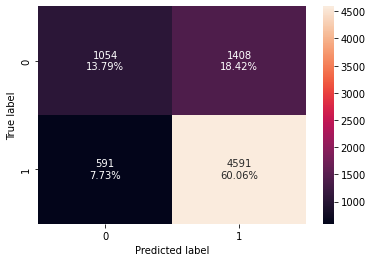

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

**The AdaBoost has a consistent result with an F1 of 82% on the training and 82% on the testing data.**

**Hyperparameter Tuning- AdaBoost Classifier**

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.718042  0.780162    0.79187  0.785973
   Accuracy    Recall  Precision        F1
0  0.718472  0.783674   0.797526  0.790539


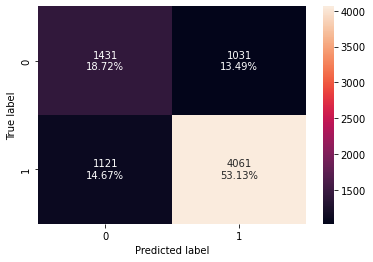

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

**Both the training and testing F1 dropped after tuning to 79% from 82%.**

## **Gradient Boost Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755607  0.876479   0.781704  0.826383
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751308  0.870513   0.785752  0.825964


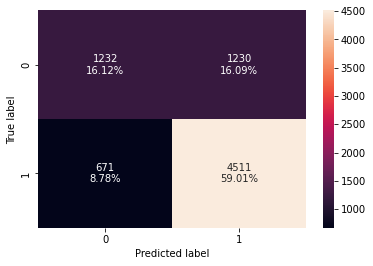

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

**F1 scores for both training and testing are 83%. Let's tune to see if we can get a higher score.**

**Hyperparameter Tuning- Gradient Boosting**

Training performance:
    Accuracy   Recall  Precision        F1
0  0.760933  0.87707   0.787036  0.829617
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.750262  0.864724    0.78766  0.824395


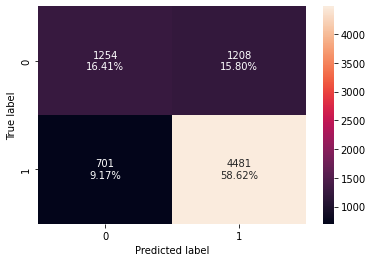

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

**There was very little change in the F1 scores after tuning. With training staying at 83% and testing dropping to 82%.**

## **XGBoost Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754766  0.873944   0.782096  0.825473
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.75157  0.867619   0.787528  0.825636


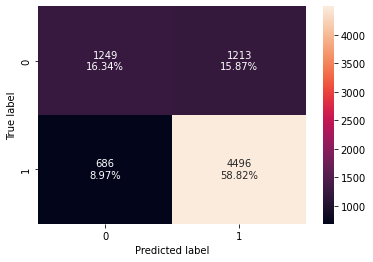

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

**Both the testing and training data show a F1 score of 83% with the XGBoost Classifier.**

**Hyperparameter Tuning- XGBoost Classifier**

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)


XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

**Checking the Hyperparameter Tuned XGBoost Classifer Model**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.752915  0.877577   0.778344  0.824987
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.751047  0.87225   0.784586  0.826099


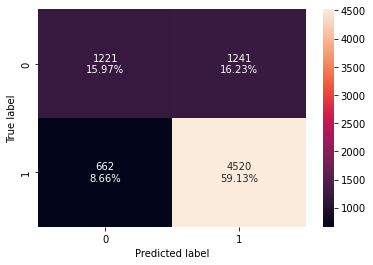

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

**Like so many of the other models, the XGBoost tuned F1 score for training is 82% and testing is 83%.**

**Stacking Classifier**

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                

**Checking Performance on Stacking Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764185  0.885603   0.786111  0.832896
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.752224  0.87225   0.785814  0.826779


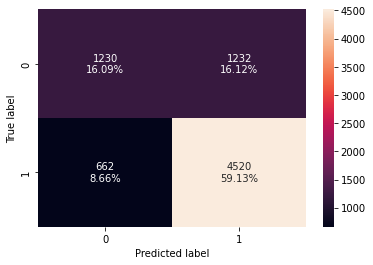

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

**Here again we see the F1 score for the testing and training data with the Stacking Classifier is 83%.**

### **Comparing all models.**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
     "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.672741,0.984526,0.663602,0.999944,0.765699,0.737441,0.718042,0.755607,0.760933,0.754766,0.752915,0.764185
Recall,1.0,0.996198,0.985468,1.000000,1.000000,0.910696,0.885941,0.780162,0.876479,0.877070,0.873944,0.877577,0.885603
Precision,1.0,0.670591,0.991162,0.663602,0.999916,0.775412,0.758810,0.791870,0.781704,0.787036,0.782096,0.778344,0.786111
F1,1.0,0.801591,0.988307,0.797789,0.999958,0.837627,0.817462,0.785973,0.826383,0.829617,0.825473,0.824987,0.832896


**Testing Performance Comparison:**


In [ ]:
 #testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664050,0.683281,0.727368,0.749084,0.696102,0.677917,0.738488,0.718472,0.751308,0.750262,0.751570,0.751047,0.752224
Recall,0.742184,0.994211,0.833655,0.894056,0.773061,1.000000,0.885951,0.783674,0.870513,0.864724,0.867619,0.872250,0.872250
Precision,0.757385,0.683017,0.779502,0.771909,0.777411,0.677917,0.765294,0.797526,0.785752,0.787660,0.787528,0.784586,0.785814
F1,0.749708,0.809745,0.805670,0.828505,0.775230,0.808046,0.821215,0.790539,0.825964,0.824395,0.825636,0.826099,0.826779


**The majority of models fit both the testing and training data in the 80% range for the F1 scores. There are a few models that overfit the training but not the testing data so those will not be considered. Of all of the models, the Gradient Boost Classifier fit both the training and testing data with an 83% F1 score making it the highest F1 score on both sets for all models.**

**Important Features According to the Gradient Boost Classifier Model**

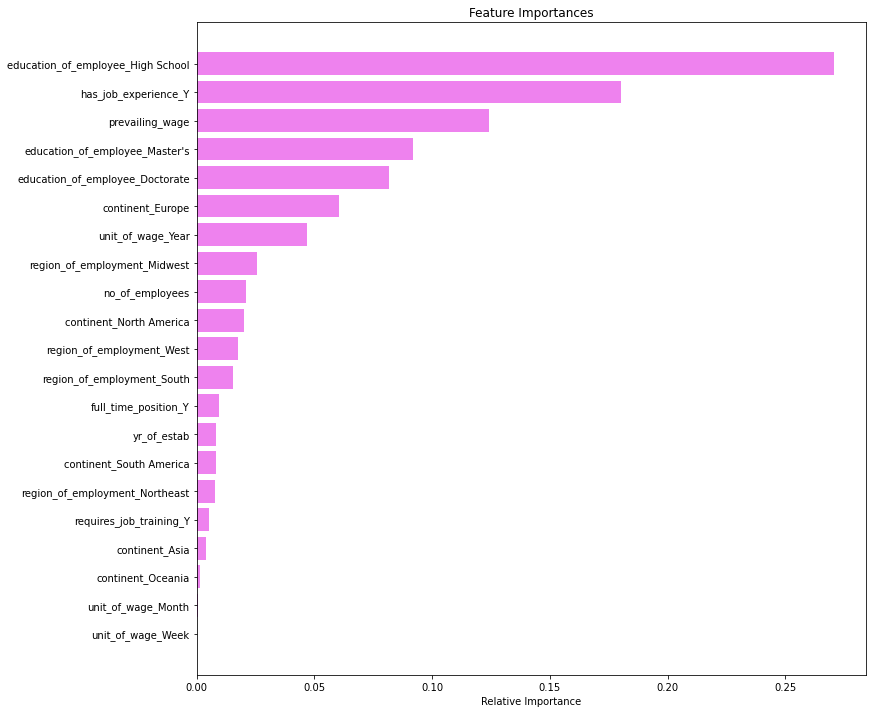

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**The most relative features to consider according to the GB Classifier model are the education level of the applicant, whether the applicant has previous job experience, the continent of origin, salaried workers and those applying to work in the Midwest.**

## Actionable Insights and Recommendations

Based on our analysis, we can say that the certified applicants have the following features in comparison to denied applicants:


*   A candidate has a significantly higher chance of being certified if they have a degree that is higher than a High School Diploma. Those holding Masters or Doctorate degrees have a higher likelihood of being certified and those with a High School education have a high likelihood of being denied. 
*   A candidate has a significantly higher change of being certified if they have prior job experience.
*   The prevailing wage of the applicant has an impact of the certification of the applicants with salaried applicants being more likely to obtain certification.
*   Applicants from the continent of Europe are the most likely to be certfied.
*   Applicants that are applying to work in the Midwest are the most likely to obtain certification.


A suitable profile for the OFLC to judge applicants for whom the visa should be certified would be the following:
*   The applicant has a Bachelor's degree or higher for education. He/She has previous job expereience and will be a yearly salary. Those applicants from Europe who are applying for a position in the Midwest should be prioritized. 

A suitable profile for the OFLC to judge applicants for whom the visa should be denied would be the following:
*   The applicants with a high school level of education with no previous job experience have a high chance of denial. Also those candidates that are applying for hourly, weekly or monthly pay are more likely to be denied.  










In [ ]:
%%shell
jupyter nbconvert --to html /content/CURRENT_ACTIVE_PROJECT_DSBA_Project_ET_EasyVisa_Fullcode.ipynb

[NbConvertApp] Converting notebook /content/CURRENT_ACTIVE_PROJECT_DSBA_Project_ET_EasyVisa_Fullcode.ipynb to html
[NbConvertApp] Writing 1125857 bytes to /content/CURRENT_ACTIVE_PROJECT_DSBA_Project_ET_EasyVisa_Fullcode.html
